In [4]:
import numpy as np 
n_states=16 
n_actions=4 
goal_state=15 

Q_table=np.zeros((n_states,n_actions))

set hypermeters 

In [5]:
learning_rate=0.8 
discount_factor=0.95 
exploration_prob=0.2 
epochs=1000

implement the q learning algorithm

In [7]:
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)  
    while current_state != goal_state:
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  
        else:
            action = np.argmax(Q_table[current_state])  

        next_state = (current_state + 1) % n_states

        reward = 1 if next_state == goal_state else 0

        Q_table[current_state, action] += learning_rate * \
            (reward + discount_factor *
             np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state

output the learned q table 

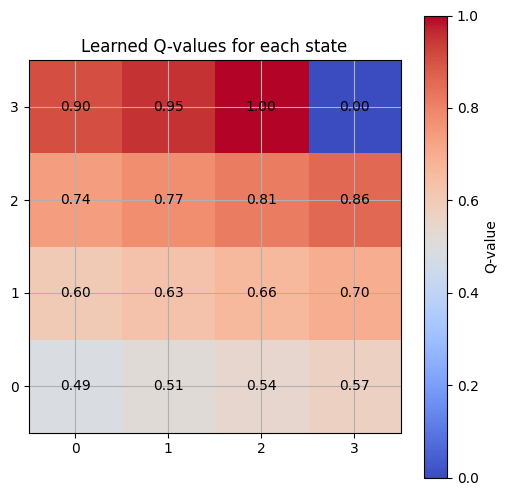

Learned Q-table:
[[0.18442063 0.48767498 0.48751424 0.46816798]
 [0.51334208 0.50923535 0.51333551 0.4928084 ]
 [0.54036008 0.5403255  0.54036009 0.54036008]
 [0.56880009 0.56880009 0.56879819 0.56880009]
 [0.59873694 0.59873694 0.59873694 0.59872928]
 [0.63024941 0.63024934 0.63024941 0.63024941]
 [0.66342043 0.66342043 0.66342043 0.66342043]
 [0.6983373  0.6983373  0.6983373  0.6983373 ]
 [0.73509189 0.73509189 0.73509189 0.73509189]
 [0.77378094 0.77378094 0.77378094 0.77378094]
 [0.81450625 0.81450625 0.81450625 0.81450625]
 [0.857375   0.857375   0.857375   0.857375  ]
 [0.9025     0.9025     0.9025     0.9025    ]
 [0.95       0.95       0.95       0.95      ]
 [1.         1.         1.         1.        ]
 [0.         0.         0.         0.        ]]


In [ ]:
import matplotlib.pyplot  as plt
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4)) 

# Plot the grid of Q-values
plt.figure(figsize=(10, 10))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()  # To match grid layout
plt.grid(True)

# Annotating the Q-values on the grid
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# Print learned Q-table
print("Learned Q-table:")
print(Q_table)
